In [70]:
import pandas as pd
import numpy as np

# data viz
import plotly.express as px
import matplotlib.pyplot as plt

import os
import datetime

import set_config

In [2]:
dir_local = set_config.ConfigSectionMap("SectionOne")['local']
dir_sanofi_share = set_config.ConfigSectionMap("SectionOne")['sanofi']
dir_race = set_config.ConfigSectionMap("SectionOne")['race']

print ("dir_sanofi_share is %s" % (dir_sanofi_share))
print ("dir_local is %s" % (dir_local))
print ("dir_race is %s" % (dir_race))


dir_sanofi_share is C:/Users/mark_/Sanofi/Sanofi x McLaren sharing - General/Frankfurt sprint/SFD/
dir_local is C:/Users/mark_/Documents/McLaren2021/Sanofi/
dir_race is C:/Users/mark_/Sanofi/Sanofi x McLaren sharing - General/Race Dashboard data


In [3]:
filename = 'oee_extracts_all_sites.xlsx'
path = os.path.join(dir_local, filename)
df = pd.read_excel(path, na_values=('-'))

In [4]:
df.dropna(subset={'Week'}, inplace=True)

In [5]:
df['WeekOfYear'] = pd.to_numeric(df['Week'].str[1:3])
df['Year'] = pd.to_numeric(df['Week'].str[4:])
dates = df.Year*100+df.WeekOfYear
df['Date'] = pd.to_datetime(dates.astype(str) + '0', format='%Y%W%w')
df.head()

,Week,Line,OEE %,Changeover,Unplanned_tech_loss,Availability %,Performance %,WeekOfYear,Year,Date
24,W01-2020,LSX - 1030 Packaging Line,0.519638,0.069918,0.211838,0.711021,0.730834,1,2020,2020-01-12
25,W01-2020,LSX - 1070-1 Packaging Line,0.359199,0.062479,0.470711,0.474172,0.762421,1,2020,2020-01-12
26,W01-2020,LSX - 1070-2 Packaging Line,0.031299,0.000000,0.000000,1.000000,0.031299,1,2020,2020-01-12
27,W01-2020,LSX - C65-1 Packaging Line,0.390467,0.139973,0.296680,0.601649,0.649678,1,2020,2020-01-12
28,W01-2020,LSX - C65-2 Packaging Line,0.158301,0.089099,0.137793,0.706554,0.224047,1,2020,2020-01-12


In [6]:
df.dropna(subset=['WeekOfYear'], inplace=True)
df
# df

,Week,Line,OEE %,Changeover,Unplanned_tech_loss,Availability %,Performance %,WeekOfYear,Year,Date
24,W01-2020,LSX - 1030 Packaging Line,0.519638,0.069918,0.211838,0.711021,0.730834,1,2020,2020-01-12
25,W01-2020,LSX - 1070-1 Packaging Line,0.359199,0.062479,0.470711,0.474172,0.762421,1,2020,2020-01-12
26,W01-2020,LSX - 1070-2 Packaging Line,0.031299,0.000000,0.000000,1.000000,0.031299,1,2020,2020-01-12
27,W01-2020,LSX - C65-1 Packaging Line,0.390467,0.139973,0.296680,0.601649,0.649678,1,2020,2020-01-12
28,W01-2020,LSX - C65-2 Packaging Line,0.158301,0.089099,0.137793,0.706554,0.224047,1,2020,2020-01-12
...,...,...,...,...,...,...,...,...,...,...
8935,W53-2020,TRS - L19 Packaging Line,NaN,NaN,NaN,NaN,NaN,53,2020,2021-01-10
8936,W53-2020,TRS - L21 Packaging Line,NaN,NaN,NaN,NaN,NaN,53,2020,2021-01-10
8937,W53-2020,TRS - L22 Packaging Line,NaN,NaN,NaN,NaN,NaN,53,2020,2021-01-10
8938,W53-2020,TRS - L24 Packaging Line,NaN,NaN,NaN,NaN,NaN,53,2020,2021-01-10


In [60]:
print ("Number of Unique Plants/Factories: {}".format(len(rolling_avg.Line.str[:3].unique())))
print ("Number of Unique Lines: {}".format(len(rolling_avg.Line.unique())))
print ("Number of Unique Lines recording OEE % values: {}".format(len(rolling_avg[rolling_avg['OEE %'] > 0].Line.unique())))

Number of Unique Plants/Factories: 19
Number of Unique Lines: 231
Number of Unique Lines recording OEE % values: 169


<AxesSubplot:xlabel='Line,None'>

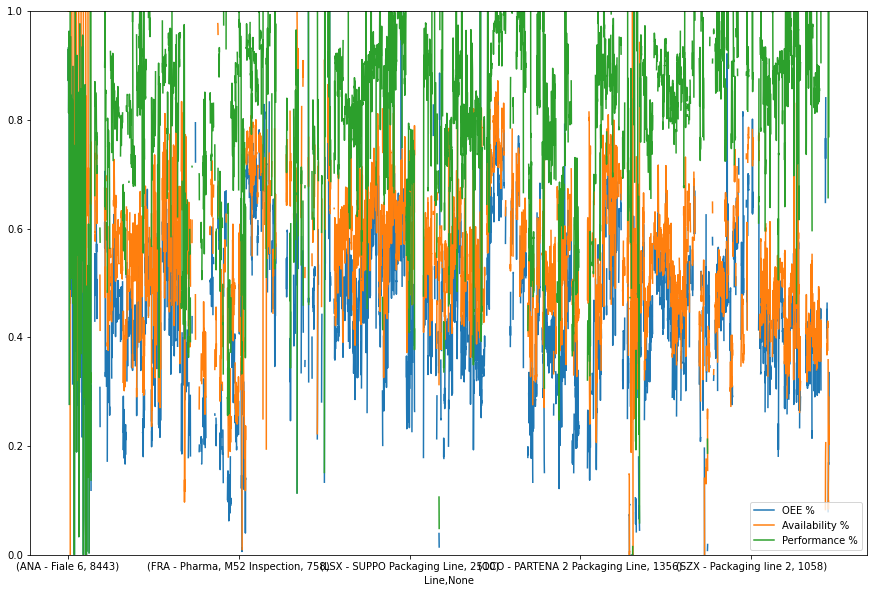

In [8]:
df.groupby('Line')[['OEE %','Availability %','Performance %']].rolling(window=4).mean().plot(figsize=(15,10), ylim=(0,1))

In [9]:
df.groupby('Line')[['OEE %','Availability %','Performance %']].agg(['count','mean'])

OEE %           Availability %            \
                               count      mean          count      mean   
Line                                                                      
ANA - Fiale 6                      1  0.018917              1  0.467283   
ELB - Extraction B12 1st cycle    27  0.733439             27  0.750083   
ELB - FERMENTATION E05            27  0.611262             27  0.909730   
ELB - FERMENTATION E06            27  0.451722             27  0.846434   
ELB - FERMENTATION E07            27  0.548899             27  0.865264   
...                              ...       ...            ...       ...   
WAT - AIL2 Packaging               8  0.456916              8  0.393191   
WAT - LYO INSPECTION               7  7.262697              7  0.401163   
WAT - LYO Packaging Line 3         8  0.124131              8  0.228860   
WAT - LYO Packaging Line 9         8  0.251019              8  0.263696   
WAT - PFS Filling Line             0       NaN              0       NaN   

                               Performance %             
                                       count       mean  
Line                                                     
ANA - Fiale 6                              1   0.041494  
ELB - Extraction B12 1st cycle            27   0.896803  
ELB - FERMENTATION E05                    27   0.665360  
ELB - FERMENTATION E06                    27   0.456475  
ELB - FERMENTATION E07                    26   0.611429  
...                                      ...        ...  
WAT - AIL2 Packaging                       8   1.157775  
WAT - LYO INSPECTION                       7  19.079511  
WAT - LYO Packaging Line 3                 8   1.253745  
WAT - LYO Packaging Line 9                 8   1.165633  
WAT - PFS Filling Line                     0        NaN  

[236 rows x 6 columns]

In [10]:
df.set_index('Date', inplace=True)

In [11]:
df.groupby([pd.Grouper(freq='W'),'Line']).mean()

OEE %  Changeover  \
Date       Line                                                
2019-12-22 LSX - 1030 Packaging Line    0.420687    0.064168   
           LSX - 1070-1 Packaging Line  0.484414    0.081965   
           LSX - 1070-2 Packaging Line  0.333714    0.053591   
           LSX - C65-1 Packaging Line   0.489151    0.138048   
           LSX - C65-2 Packaging Line   0.652574    0.100262   
...                                          ...         ...   
2021-12-12 WAT - AIL2 Packaging         0.285589    0.187658   
           WAT - LYO INSPECTION         0.323387    0.000000   
           WAT - LYO Packaging Line 3   0.218169    0.391559   
           WAT - LYO Packaging Line 9   0.373803    0.492465   
           WAT - PFS Filling Line            NaN         NaN   

                                        Unplanned_tech_loss  Availability %  \
Date       Line                                                               
2019-12-22 LSX - 1030 Packaging Line               0.449807        0.478008   
           LSX - 1070-1 Packaging Line             0.355933        0.601635   
           LSX - 1070-2 Packaging Line             0.530042        0.395914   
           LSX - C65-1 Packaging Line              0.338704        0.535639   
           LSX - C65-2 Packaging Line              0.201653        0.715837   
...                                                     ...             ...   
2021-12-12 WAT - AIL2 Packaging                    0.527863        0.246672   
           WAT - LYO INSPECTION                    0.561805        0.444221   
           WAT - LYO Packaging Line 3              0.341620        0.107151   
           WAT - LYO Packaging Line 9              0.082049        0.311634   
           WAT - PFS Filling Line                       NaN             NaN   

                                        Performance %  WeekOfYear    Year  
Date       Line                                                            
2019-12-22 LSX - 1030 Packaging Line         0.889270        50.0  2019.0  
           LSX - 1070-1 Packaging Line       0.810673        50.0  2019.0  
           LSX - 1070-2 Packaging Line       0.850691        50.0  2019.0  
           LSX - C65-1 Packaging Line        0.918572        50.0  2019.0  
           LSX - C65-2 Packaging Line        0.916370        50.0  2019.0  
...                                               ...         ...     ...  
2021-12-12 WAT - AIL2 Packaging              1.163458        49.0  2021.0  
           WAT - LYO INSPECTION              0.727985        49.0  2021.0  
           WAT - LYO Packaging Line 3        2.036994        49.0  2021.0  
           WAT - LYO Packaging Line 9        1.253848        49.0  2021.0  
           WAT - PFS Filling Line                 NaN        49.0  2021.0  

[8856 rows x 7 columns]

In [12]:
df.sort_index(inplace=True)

In [13]:
rolling_avg = df.groupby('Line')[['OEE %','Performance %','Availability %']].rolling(window=4).mean().reset_index()

In [81]:
# keep the data after this start date
start_date = '2021-11-01'

rolling_avg = rolling_avg[rolling_avg.Date >= start_date]

# keep only the lines actively reporting OEE 
active_rolling = rolling_avg.dropna(subset={'OEE %'})

In [93]:
#  create a Plant column from first 3 chars of Line - will do properly later
active_rolling['Plant'] = active_rolling.Line.str[:3]
active_rolling

<ipython-input-93-235679fd5446>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Line,Date,OEE %,Performance %,Availability %,Plant
23,ELB - Extraction B12 1st cycle,2021-11-07,0.795330,1.725741,0.474908,ELB
24,ELB - Extraction B12 1st cycle,2021-11-14,0.820368,1.543931,0.535938,ELB
25,ELB - Extraction B12 1st cycle,2021-11-21,0.855380,1.586336,0.543582,ELB
26,ELB - Extraction B12 1st cycle,2021-11-28,0.716087,1.032890,0.320868,ELB
27,ELB - Extraction B12 1st cycle,2021-12-05,0.577270,0.576205,-0.007901,ELB
...,...,...,...,...,...,...
8909,WAT - LYO Packaging Line 9,2021-11-14,0.166988,0.769164,0.290127,WAT
8910,WAT - LYO Packaging Line 9,2021-11-21,0.222417,1.041534,0.236636,WAT
8911,WAT - LYO Packaging Line 9,2021-11-28,0.264629,1.263474,0.227115,WAT
8912,WAT - LYO Packaging Line 9,2021-12-05,0.306373,1.646607,0.203074,WAT


In [94]:
px.line(active_rolling, x='Date', y='OEE %', 
    title='OEE %',
    color='Line',
    range_y=(0,1)
    )

In [95]:
len(active_rolling.Line.unique())

169

In [96]:
px.bar(active_rolling.groupby('Line').tail(1).sort_values(by='OEE %', ascending=False), x='Line', y='OEE %',
     title='Latest Rolling OEE by Line',
    range_y=(0,1)
     )

In [87]:
px.bar(active_rolling.dropna(subset=['OEE %']).groupby('Line').tail(1).sort_values(by='Availability %', ascending=False), x='Line', y='Availability %',
     title='Latest Rolling Availability %',
    range_y=(0,1)
     )

In [128]:
metrics = ['OEE %','Availability %','Performance %']

for metric in metrics:

     fig = px.bar(active_rolling.dropna(subset=[metric]).groupby('Line').tail(1).sort_values(by=metric, ascending=False), x='Line', y=metric,
     title='Latest Rolling {} by Line'.format(metric),
     range_y=(0,1)
     )
     fig.show()

for metric in metrics:

    fig = px.bar(active_rolling.dropna(subset=[metric]).groupby('Plant').mean().reset_index().sort_values(by=metric, ascending=False), 
    x='Plant', 
    y=metric, 
    title='Latest Rolling {} by Plant'.format(metric), 
    )
    fig.show()

    

In [127]:
active_rolling.dropna(subset=[metric]).groupby('Plant').mean().sort_values(by='OEE %').reset_index()

,Plant,OEE %,Performance %,Availability %
0,MLE,0.220491,0.759494,0.297664
1,LTR,0.287840,0.605258,0.496683
2,SCO,0.368010,0.738331,0.533737
3,FRA,0.376129,0.736373,0.493767
4,TRS,0.379216,0.858631,0.436676
5,VDR,0.405337,1.057927,0.396019
6,ORI,0.425178,0.804816,0.502408
7,SUZ,0.445438,1.081729,0.448774
8,ELB,0.457958,0.616858,0.633279
9,OCO,0.489352,0.834880,0.579659


In [126]:
rolling_avg[rolling_avg.Line == 'VER - UHLMANN-1040-3']

,Line,Date,OEE %,Performance %,Availability %
8852,VER - UHLMANN-1040-3,2021-11-21,NaN,NaN,NaN
8853,VER - UHLMANN-1040-3,2021-11-28,NaN,NaN,NaN
8854,VER - UHLMANN-1040-3,2021-12-05,NaN,NaN,NaN
8855,VER - UHLMANN-1040-3,2021-12-12,NaN,NaN,NaN


In [39]:
import seaborn as sns

# sns.displot(rolling_avg[rolling_avg['OEE %'] < 4].dropna(subset=['OEE %'])['OEE %'])
fig = px.histogram(rolling_avg[rolling_avg['OEE %'] < 12].dropna(subset=['OEE %'])['OEE %'])
fig.show()

In [74]:
np.arange(1,len(plants)+1)

array([   1,    2,    3, ..., 8914, 8915, 8916])

Text(0, 0.5, 'Availability')

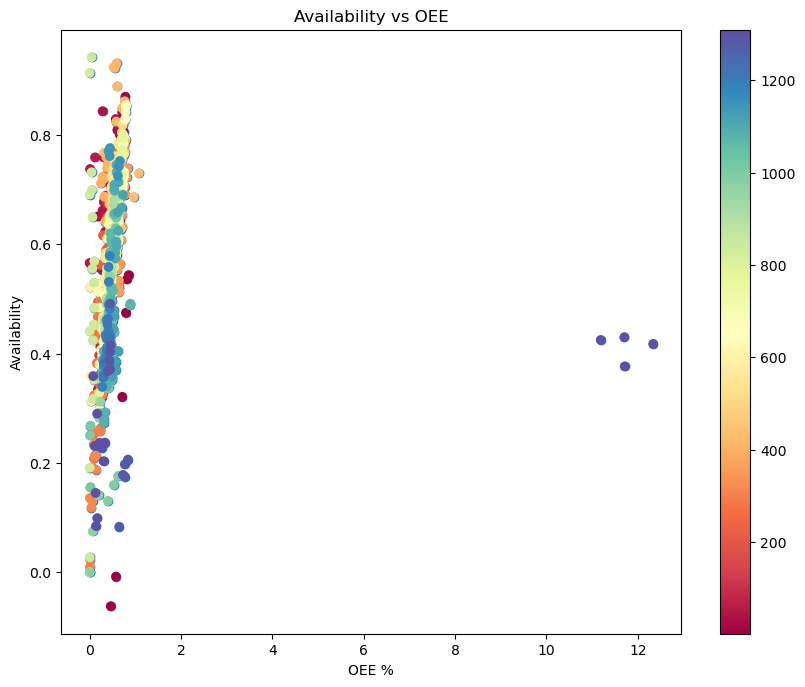

In [77]:
x = rolling_avg['OEE %'][rolling_avg['OEE %']]
y = rolling_avg['Availability %']
plants = (rolling_avg['Line'].str[:3])
color = np.arange(1,len(plants)+1)

plt.scatter(x, y)
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.title('Availability vs OEE')
plt.scatter(x, y, c=color, cmap='Spectral')
plt.colorbar()
plt.xlabel('OEE %')
plt.ylabel('Availability')